
# Day 4: Data Cleaning and Exploration Project

 On Day 4, we'll put into practice what we learned about data cleaning and exploratory data analysis (EDA) by working on a real-world data cleaning and exploration project. We'll use a publicly available dataset and go through the steps of loading, cleaning, and exploring the data.

## Topics Covered:
- Loading the Dataset
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Summary and Documentationā

## Loading the Dataset

Steps:
- Download the dataset from Kaggle's Titanic page.(https://www.kaggle.com/c/titanic)
- Load the dataset into a Pandas DataFrame.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic_train.csv')

# Display the first few rows of the dataset
print(df.head())

# Display dataset information
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

## Data Cleaning

Steps:
- Identify and handle missing values.
- Remove duplicates.
- Correct data types.
- Handle outliers.

### Handling Missing Values

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Removing Duplicates

In [3]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


0


### Correcting Data Types

In [4]:
# Convert data types if necessary
df['Age'] = df['Age'].astype(int)

### Handling Outliers

In [5]:
# Handling outliers in 'Fare' column using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

### Handling Outliers

#### Identifying Outliers Using the IQR Method

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('titanic_train.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'Fare' column
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers)


     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

#### Visualizing Outliers

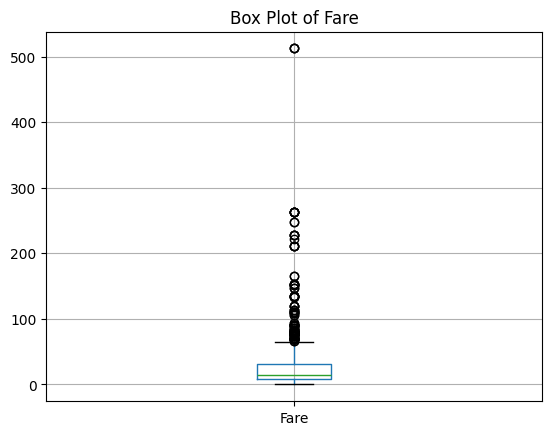

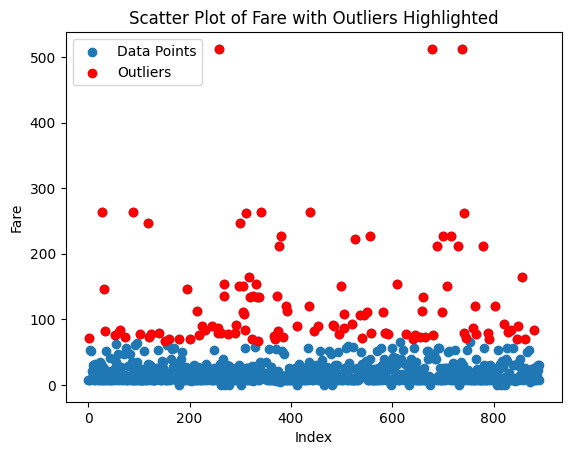

In [8]:
import matplotlib.pyplot as plt

# Box plot for 'Fare'
df.boxplot(column='Fare')
plt.title('Box Plot of Fare')
plt.show()

# Scatter plot for 'Fare' with outliers highlighted
plt.scatter(df.index, df['Fare'], label='Data Points')
plt.scatter(outliers.index, outliers['Fare'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare with Outliers Highlighted')
plt.legend()
plt.show()


#### Removing Outliers

In [9]:
# Remove outliers
df_cleaned = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Display the number of removed outliers
print(f'Removed {len(df) - len(df_cleaned)} outliers from the dataset.')

Removed 116 outliers from the dataset.


#### Analyzing the Impact of Removing Outliers

Summary statistics before removing outliers:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Summary statistics after removing outliers:
count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64


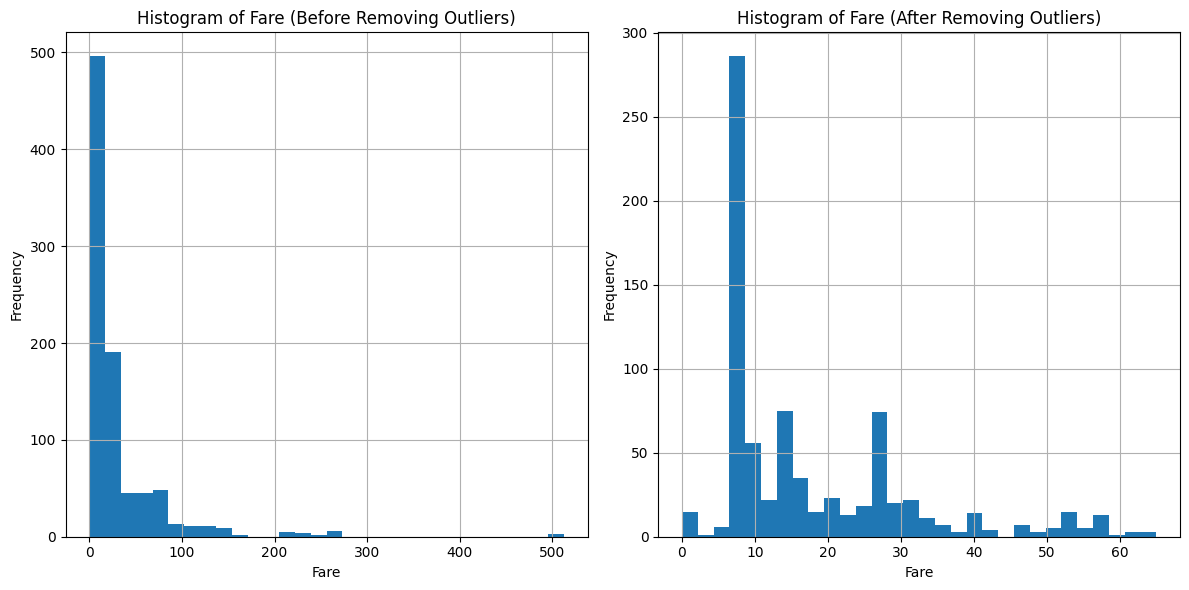

In [10]:
# Summary statistics before removing outliers
print("Summary statistics before removing outliers:")
print(df['Fare'].describe())

# Summary statistics after removing outliers
print("Summary statistics after removing outliers:")
print(df_cleaned['Fare'].describe())

# Histograms to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Fare'].hist(bins=30)
plt.title('Histogram of Fare (Before Removing Outliers)')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_cleaned['Fare'].hist(bins=30)
plt.title('Histogram of Fare (After Removing Outliers)')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)

Steps:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

### Univariate Analysis

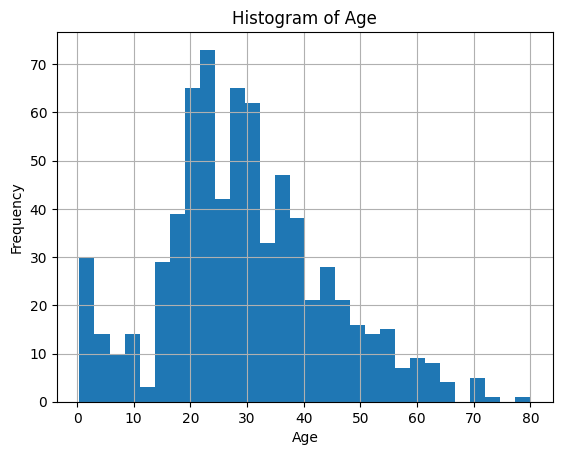

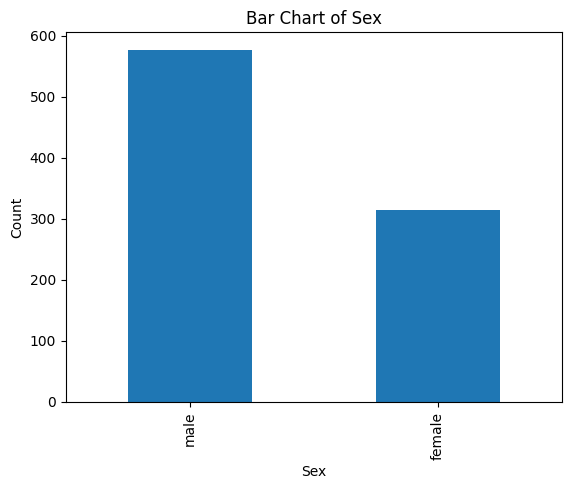

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for 'Age'
df['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for 'Sex'
df['Sex'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis

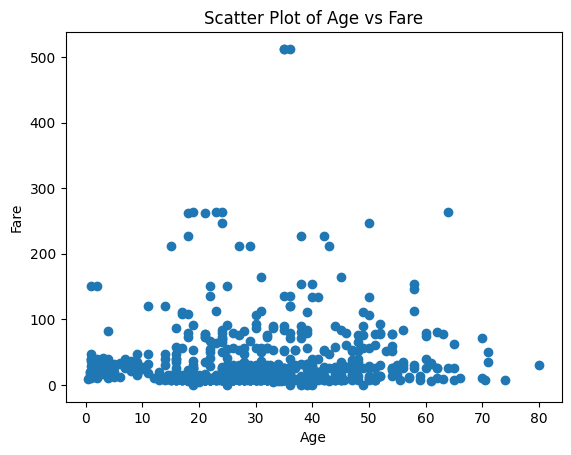

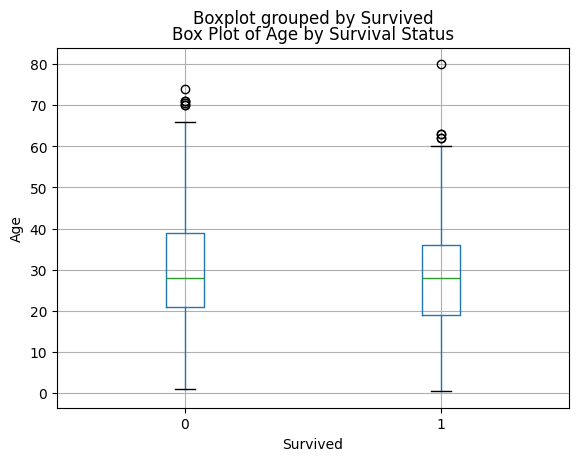

In [12]:
# Scatter plot for 'Age' vs 'Fare'
plt.scatter(df['Age'], df['Fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Box plot for 'Age' by 'Survived'
df.boxplot(column='Age', by='Survived')
plt.title('Box Plot of Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


### Multivariate Analysis

##### Pair Plot

Visualized relationships between multiple variables using a pair plot

c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\amey9\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

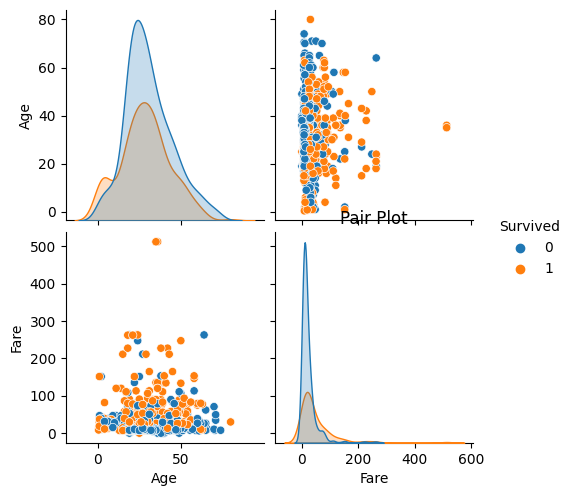

In [22]:
import seaborn as sns

sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')
plt.title('Pair Plot')
plt.show()


#### Correlation Matrix Heatmap

Created a heatmap to visualize correlations between variables

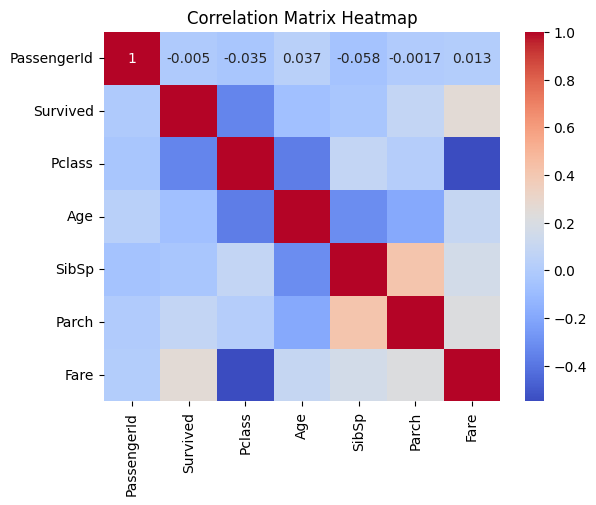

In [25]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Summary

lets summarise the steps and finding of the project and document the process.

Summary of Data Cleaning

- Handled missing values in Age, Embarked, and Cabin columns.
- Removed duplicates.
- Corrected data types for the Age column.
- Handled outliers in the Fare column.

Summary of EDA Findings

- The majority of passengers were in the age range of 20-40.
- There were more male passengers than female passengers.
- Higher fares were generally associated with higher survival rates.

The visualizations provide valuable insights into the Titanic dataset. Key findings include:

- igher-class passengers and those who paid higher fares had better survival rates.
- Younger passengers had a higher likelihood of survival.
- There were significantly more male passengers than female passengers.
- The majority of passengers were in the age range of 20-40.
- The fare distribution was highly skewed with significant outliers, indicating a wide disparity in the fares paid by different passengers.

These insights help us understand the factors that influenced survival on the Titanic and the characteristics of the passengers. The data cleaning and EDA steps are crucial for uncovering these patterns and preparing the data for further analysis and modeling.